### 다중클래스 분류 프로그램
- 심층신경망 사용 

In [6]:
import pandas as pd
import tensorflow as tf 

In [23]:
white = pd.read_csv("winequality-white.csv", sep=';')
red = pd.read_csv("winequality-red.csv", sep=';')

In [24]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
print(white['quality'].value_counts())
print(red['quality'].value_counts())


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [31]:
print(white.shape)
print(red.shape)

(4898, 12)
(1599, 12)


In [35]:
white['label'] = 0
red['label'] = 1

In [38]:
wine_data = pd.concat([white, red])
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [42]:
# 0~10 중 3, 4, 5, 6, 7, 8, 9만 존재 
wine_data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

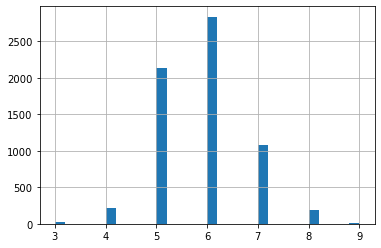

In [45]:
wine_data['quality'].hist(bins=30)

In [47]:
wine_data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
label                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [48]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
train_df = pd.DataFrame(X, columns=wine_data.drop('quality', axis=1).columns)

In [55]:
train_df.shape

(6497, 12)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)


In [61]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [67]:
print(X_train['label'].value_counts())
print(X_test['label'].value_counts())

# -0.57 : white wine
# 1.75 : red wine 

-0.571367    3912
 1.750190    1285
Name: label, dtype: int64
-0.571367    986
 1.750190    314
Name: label, dtype: int64


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(11, activation='softmax'))  # 0~9 예측

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
